# AI-based Surveying the Impact of Environmental, Climatic, Economic and Demographic Conditions on the Epidemic Outbreak Rate of COVID-19

$Mehryar{\,}Majd$, $Ramin{\,}Mousa$ \& $Arsalan{\,}Mousazadeh$

__Abstract:__ This study aims to have an analytical and predictive approach to the growth rate and spread of the first wave of COVID-19 infection and mainly focuses on its dependency on other global factors in affected countries via Artificial Intelligence-based processing of fatality data/statistics. Fatality, infected, and recovered cases in the form of the time-series data was acquired through the World Health Organization (WHO) & the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Recorded health data subsequently was analyzed by several Deep Neural Network (DNN) models to create a better intuition of epidemic outbreak rate of COVID-19. Monitoring spreading trend changes becomes more feasible via continuous observation of statistical pattern and integrating the other datasets with more global features count as factors influencing the local conditions on historical data conveys pivotal information concerning learning the pattern of epidemic progression. In this study, attention-based Sequence-to-Sequence (Seq2Seq) models empowered by Long-Short Term Memory (LSTM) and Gated Recurrent Unit (GRU) units, were deployed to predict mortality rate. Ultimately these analyses are utilized to monitor infection behaviour on time-series data and were subsequently assessed for their performance to predict the behaviour of the first wave of COVID-19 outbreak rate intensely. Demographic & environmental conditions have likely been influenced significantly to shape the reliable predictive learning algorithms for long-duration risk of COVID-19 pandemic.

### Sanitation and Analysis COVID-19 along with __weather data__
__Data Cleaning & Preprocessing__

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
from matplotlib import pyplot as plt
import os

In [2]:
df_covid_19 = pd.read_csv("novel-corona-virus/covid_19_data.csv")
df_covid_19['Date'] = pd.to_datetime(df_covid_19['ObservationDate'])
df_covid_19['Outbreak'] = 'COVID_2019'
df_sars_03 = pd.read_csv("novel-corona-virus/sars_2003_complete_dataset_clean.csv")
df_sars_03['Date'] = pd.to_datetime(df_sars_03['Date'])
df_sars_03['Province/State'] = None
df_sars_03['Outbreak'] = 'SARS_2003'
df_sars_03.rename({'Cumulative number of case(s)':'Confirmed', 'Number of deaths':'Deaths', 'Number recovered':'Recovered', 'Country':'Country/Region'},axis=1,inplace=True)
templ_cols = ['Outbreak', 'Province/State', 'Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered']
df = pd.concat([df_covid_19[templ_cols], df_sars_03[templ_cols]])
df=df_covid_19

In [3]:
df = df.reset_index(drop=True)
df['Confirmed'] = df['Confirmed'].fillna(0)
df['Province/State'] = df['Province/State'].fillna('Others')
df = df.sort_values(['Country/Region','Province/State','Date'])
t = df.groupby(['Outbreak','Country/Region','Province/State']).agg({'Confirmed':'max'})
t = t.loc[t['Confirmed'] >=0]
df = pd.merge(df,t,left_on=['Outbreak','Country/Region','Province/State'], right_index=True)



In [4]:
country_data = pd.read_csv("novel-corona-virus/countries of the world.csv")
country_data['Country'] = country_data['Country'].str.strip()
df.loc[df['Country/Region']=='US','Country/Region'] = 'United States'
df.loc[df['Country/Region']=='Mainland China','Country/Region'] = 'China'
df.loc[df['Country/Region']=='Viet Nam','Country/Region'] = 'Vietnam'
df.loc[df['Country/Region']=='UK','Country/Region'] = 'United Kingdom'
df.loc[df['Country/Region']=='South Korea','Country/Region'] = 'Korea, South'
df.loc[df['Country/Region']=='Taiwan, China','Country/Region'] = 'Taiwan'
df.loc[df['Country/Region']=='Hong Kong SAR, China','Country/Region'] = 'Hong Kong'
df = pd.merge(df, country_data, how='left', left_on=['Country/Region'], right_on=['Country'])
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
data_wthear=pd.read_csv('input/final.txt',sep='\t',error_bad_lines=False)

In [9]:
l=[]
for index,row in data_wthear.iterrows():
    s=row['updated_at'].split(' ')
    l.append(s[0])
data_wthear['updated_at']=l
data_wthear=data_wthear.dropna()
data_wthear['updated_at'] = pd.to_datetime(data_wthear['updated_at'])
df_new = pd.merge(df, data_wthear, how='inner', left_on=['Country/Region','Date','Province/State'], right_on=['Country/Region','updated_at','Province/State'])


In [10]:
df=df_new.copy()
df.loc[df['Region'].isnull(), 'Region'] = 'Others'
df.loc[df['Country'].isnull(), 'Country'] = 'Undefined'
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df = df.fillna(0)
df=df.drop('Other (%)',axis=1)

In [11]:
import locale
from fastnumbers import fast_real
Literacy=[]
Pop,Pho,Agric=[],[],[]
Coa,Clim,Bir,Dea=[],[],[],[]
Net,Inf,Arab,Crop,Ind,Serv=[],[],[],[],[],[]
for index ,row in df.iterrows():
    a=str(row['Literacy (%)']).replace(',','.')
    Literacy.append(fast_real(a))
    #----------
    a=str(row['Pop. Density (per sq. mi.)']).replace(',','.')
    Pop.append(fast_real(a))
    #----------
    a=str(row['Coastline (coast/area ratio)']).replace(',','.')
    Coa.append(fast_real(a))
    #-----------
    a=str(row['Net migration']).replace(',','.')
    Net.append(fast_real(a))
    #-----------
    a=str(row['Infant mortality (per 1000 births)']).replace(',','.')
    Inf.append(fast_real(a))
    #
    #
    a=str(row['Phones (per 1000)']).replace(',','.')
    Pho.append(fast_real(a))
    #
    a=str(row['Arable (%)']).replace(',','.')
    Arab.append(fast_real(a))
    #
    a=str(row['Crops (%)']).replace(',','.')
    Crop.append(fast_real(a))
    #
    a=str(row['Climate']).replace(',','.')
    Clim.append(fast_real(a))
    #
    a=str(row['Birthrate']).replace(',','.')
    Bir.append(fast_real(a))
    #
    a=str(row['Deathrate']).replace(',','.')
    Dea.append(fast_real(a))
    #
    a=str(row['Agriculture']).replace(',','.')
    Agric.append(fast_real(a))
    #
    a=str(row['Industry']).replace(',','.')
    Ind.append(fast_real(a))
    #
    a=str(row['Service']).replace(',','.')
    Serv.append(fast_real(a))
df['Literacy (%)']=Literacy
df['Pop. Density (per sq. mi.)']=Pop
df['Coastline (coast/area ratio)']=Coa
df['Net migration']=Net
df['Infant mortality (per 1000 births)']=Inf
df['Phones (per 1000)']=Pho
df['Arable (%)']=Arab
df['Crops (%)']=Crop
df['Climate']=Clim
df['Birthrate']=Bir
df['Deathrate']=Dea
df['Agriculture']=Agric
df['Industry']=Ind
df['Service']=Serv
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed_x,Deaths,Recovered,Date,Outbreak,...,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,created_at,updated_at,City,Long,lat,Month,Week
0,5445,03/14/2020,New South Wales,Australia,2020-03-14T13:33:04,112.0,2.0,4.0,2020-03-14,COVID_2019,...,1577639580,105.15,1577681460,3/14/2020 11:01,2020-03-14,Sydney,147.0045,-32.23834,3,11
1,5445,03/14/2020,New South Wales,Australia,2020-03-14T13:33:04,112.0,2.0,4.0,2020-03-14,COVID_2019,...,1577725260,105.79,1577761380,3/14/2020 11:01,2020-03-14,Sydney,147.0045,-32.23834,3,11
2,5445,03/14/2020,New South Wales,Australia,2020-03-14T13:33:04,112.0,2.0,4.0,2020-03-14,COVID_2019,...,1577821080,99.26,1577854980,3/14/2020 11:01,2020-03-14,Sydney,147.0045,-32.23834,3,11
3,5445,03/14/2020,New South Wales,Australia,2020-03-14T13:33:04,112.0,2.0,4.0,2020-03-14,COVID_2019,...,1577898840,102.89,1577941080,3/14/2020 11:01,2020-03-14,Sydney,147.0045,-32.23834,3,11
4,5445,03/14/2020,New South Wales,Australia,2020-03-14T13:33:04,112.0,2.0,4.0,2020-03-14,COVID_2019,...,1577984340,110.20,1578027480,3/14/2020 11:02,2020-03-14,Sydney,147.0045,-32.23834,3,11


In [12]:
df['Country/Region'] = df['Country/Region'].astype('category')
df['Outbreak'] = df['Outbreak'].astype('category')
df['precipType'] = df['precipType'].astype('category')
df['Country/Region'] = df['Country/Region'].cat.codes
df['Outbreak'] = df['Outbreak'].cat.codes
df['precipType'] = df['precipType'].cat.codes


In [13]:
col=[ 'Outbreak',  'Country/Region', 'Population','Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration','Confirmed_y',
       'Infant mortality (per 1000 births)',  'Literacy (%)', 'Crops (%)',
       'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry','temperatureLow','humidity','temperatureHigh','Confirmed_x','Deaths','Recovered']
newdf=df[col]
newdf.head()

,Outbreak,Country/Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Confirmed_y,Infant mortality (per 1000 births),Literacy (%),...,Birthrate,Deathrate,Agriculture,Industry,temperatureLow,humidity,temperatureHigh,Confirmed_x,Deaths,Recovered
0,0,0,20264082.0,7686850.0,2.6,0.34,3.98,171.0,4.69,100.0,...,12.14,7.51,0.038,0.262,79.41,0.11,105.65,112.0,2.0,4.0
1,0,0,20264082.0,7686850.0,2.6,0.34,3.98,171.0,4.69,100.0,...,12.14,7.51,0.038,0.262,72.64,0.11,106.29,112.0,2.0,4.0
2,0,0,20264082.0,7686850.0,2.6,0.34,3.98,171.0,4.69,100.0,...,12.14,7.51,0.038,0.262,68.74,0.16,99.76,112.0,2.0,4.0
3,0,0,20264082.0,7686850.0,2.6,0.34,3.98,171.0,4.69,100.0,...,12.14,7.51,0.038,0.262,71.79,0.16,103.39,112.0,2.0,4.0
4,0,0,20264082.0,7686850.0,2.6,0.34,3.98,171.0,4.69,100.0,...,12.14,7.51,0.038,0.262,85.01,0.28,110.70,112.0,2.0,4.0


In [14]:
def base_model(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    # one to many
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(LSTM(50, return_sequences=True))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
def normalize_data(data, scaler, feature_len):
    minmaxscaler = scaler.fit(data)
    normalize_data = minmaxscaler.transform(data)
    return normalize_data
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM,GRU
from keras.layers import Dense
def load_data(data, time_step=2, after_day=1, validate_percent=0.67):
    seq_length = time_step + after_day
    result = []
    for index in range(len(data) - seq_length + 1):
        result.append(data[index: index + seq_length])
    result = np.array(result)
    print('total data: ', result.shape)

    train_size = int(len(result) * validate_percent)
    train = result[:train_size, :]
    validate = result[train_size:, :]

    x_train = train[:, :time_step]
    y_train = train[:, time_step:]
    x_validate = validate[:, :time_step]
    y_validate = validate[:, time_step:]
    
     

    return [x_train, y_train, x_validate, y_validate]
def seq2seq(feature_len=1, after_day=1, input_shape=(8, 1)):
    '''
    Encoder:
    X = Input sequence
    C = LSTM(X); The context vector

    Decoder:
    y(t) = LSTM(s(t-1), y(t-1)); where s is the hidden state of the LSTM(h and c)
    y(0) = LSTM(s0, C); C is the context vector from the encoder.
    '''

    # Encoder
    encoder_inputs = Input(shape=input_shape) # (timesteps, feature)
    encoder = LSTM(units=100, return_state=True,  name='encoder')
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    states = [state_h, state_c]

    # Decoder
    reshapor = Reshape((1, 100), name='reshapor')
    decoder = LSTM(units=100, return_sequences=True, return_state=True, name='decoder')

    # Densor
    #tdensor = TimeDistributed(Dense(units=200, activation='linear', name='time_densor'))
    densor_output = Dense(units=feature_len, activation='linear', name='output')

    inputs = reshapor(encoder_outputs)
    #inputs = tdensor(inputs)
    all_outputs = []



    for _ in range(after_day):
        outputs, h, c = decoder(inputs, initial_state=states)

        #inputs = tdensor(outputs)
        inputs = outputs
        states = [state_h, state_c]

        outputs = densor_output(outputs)
        all_outputs.append(outputs)

    decoder_outputs = Lambda(lambda x: K.concatenate(x, axis=1))(all_outputs)
    model = Model(inputs=encoder_inputs, outputs=decoder_outputs)

    return model

Using TensorFlow backend.


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(newdf, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=2, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)

total data:  (44320, 6, 22)
train data:  (35456, 2, 22) (35456, 4, 22)
validate data:  (8864, 2, 22) (8864, 4, 22)


In [16]:
from keras import backend as K
from keras.models import Sequential, load_model, Model
from keras.layers import LSTM, Dense, Activation, TimeDistributed, Dropout, Lambda, RepeatVector, Input, Reshape
from keras.callbacks import ModelCheckpoint

In [17]:
 # model complie
from keras.optimizers import SGD,Adam
# root mean squared error (rmse) for regression (only for Keras tensors)
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression  (only for Keras tensors)
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
input_shape = (2, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
input_shape = (2, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
# mlp overfit on the moons dataset with patient early stopping and model checkpointing
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Instructions for updating:
Use tf.cast instead.
Train on 35456 samples, validate on 8864 samples
Epoch 1/100
35456/35456 [==============================] - 11s 304us/step - loss: 0.0736 - acc: 0.0072 - rmse: 0.2242 - mse: 0.0736 - r_square: 0.5028 - val_loss: 0.0385 - val_acc: 0.0000e+00 - val_rmse: 0.1442 - val_mse: 0.0385 - val_r_square: 0.7402
Epoch 2/100
35456/35456 [==============================] - 5s 142us/step - loss: 0.0206 - acc: 0.1016 - rmse: 0.1251 - mse: 0.0206 - r_square: 0.8634 - val_loss: 0.0315 - val_acc: 0.0000e+00 - val_rmse: 0.1315 - val_mse: 0.0315 - val_r_square: 0.7872
Epoch 3/100
35456/35456 [==============================] - 4s 126us/step - loss: 0.0131 - acc: 0.1591 - rmse: 0.0993 - mse: 0.0131 - r_square: 0.9130 - val_loss: 0.0259 - val_acc: 0.1947 - val_rmse: 0.1089 - val_mse: 0.0259 - val_r_square: 0.8227
Epoch 4/100
35456/35456 [==============================] - 5s 141us/step - loss: 0.0071 - acc: 0.2215 - rmse: 0.0732 - mse: 0.0071 - r_square: 0.9519 - v

Epoch 33/100
35456/35456 [==============================] - 8s 229us/step - loss: 0.0026 - acc: 0.1827 - rmse: 0.0448 - mse: 0.0026 - r_square: 0.9824 - val_loss: 0.0181 - val_acc: 0.1514 - val_rmse: 0.0874 - val_mse: 0.0181 - val_r_square: 0.8767
Epoch 34/100
35456/35456 [==============================] - 8s 229us/step - loss: 0.0027 - acc: 0.2586 - rmse: 0.0451 - mse: 0.0027 - r_square: 0.9822 - val_loss: 0.0218 - val_acc: 0.1869 - val_rmse: 0.0924 - val_mse: 0.0218 - val_r_square: 0.8509
Epoch 35/100
35456/35456 [==============================] - 7s 186us/step - loss: 0.0024 - acc: 0.1792 - rmse: 0.0432 - mse: 0.0024 - r_square: 0.9844 - val_loss: 0.0186 - val_acc: 0.1874 - val_rmse: 0.0888 - val_mse: 0.0186 - val_r_square: 0.8731
Epoch 36/100
35456/35456 [==============================] - 6s 163us/step - loss: 0.0023 - acc: 0.1760 - rmse: 0.0429 - mse: 0.0023 - r_square: 0.9848 - val_loss: 0.0206 - val_acc: 0.2721 - val_rmse: 0.0915 - val_mse: 0.0206 - val_r_square: 0.8591
Epoch 37

35456/35456 [==============================] - 5s 153us/step - loss: 0.0020 - acc: 0.2659 - rmse: 0.0396 - mse: 0.0020 - r_square: 0.9870 - val_loss: 0.0203 - val_acc: 0.3445 - val_rmse: 0.0905 - val_mse: 0.0203 - val_r_square: 0.8611
Epoch 67/100
35456/35456 [==============================] - 5s 154us/step - loss: 0.0019 - acc: 0.2782 - rmse: 0.0387 - mse: 0.0019 - r_square: 0.9875 - val_loss: 0.0199 - val_acc: 0.1782 - val_rmse: 0.0883 - val_mse: 0.0199 - val_r_square: 0.8633
Epoch 68/100
35456/35456 [==============================] - 5s 153us/step - loss: 0.0019 - acc: 0.2409 - rmse: 0.0382 - mse: 0.0019 - r_square: 0.9878 - val_loss: 0.0199 - val_acc: 0.1929 - val_rmse: 0.0898 - val_mse: 0.0199 - val_r_square: 0.8635
Epoch 69/100
35456/35456 [==============================] - 5s 147us/step - loss: 0.0019 - acc: 0.2457 - rmse: 0.0379 - mse: 0.0019 - r_square: 0.9880 - val_loss: 0.0199 - val_acc: 0.1193 - val_rmse: 0.0883 - val_mse: 0.0199 - val_r_square: 0.8634
Epoch 70/100
35456/35

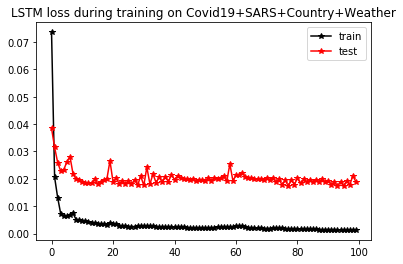

In [20]:
plt.plot(history.history['loss'],'k-*',label='train')
plt.plot(history.history['val_loss'],'r-*', label='test')
plt.legend()
plt.title("LSTM loss during training on Covid19+SARS+Country+Weather")
plt.savefig("LSTMLOSS_Covid19 Sars Weather country.pdf", bbox_inches='tight')
plt.show()

In [132]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)


----------------------------------------------------------------------------------------------------
Train Score: 0.00147075 MSE (0.03835037 RMSE ) , 3.21507140  ACC
Validation Score: 0.01532461 MSE (0.12379260 RMSE ) , 0.46249296  ACC


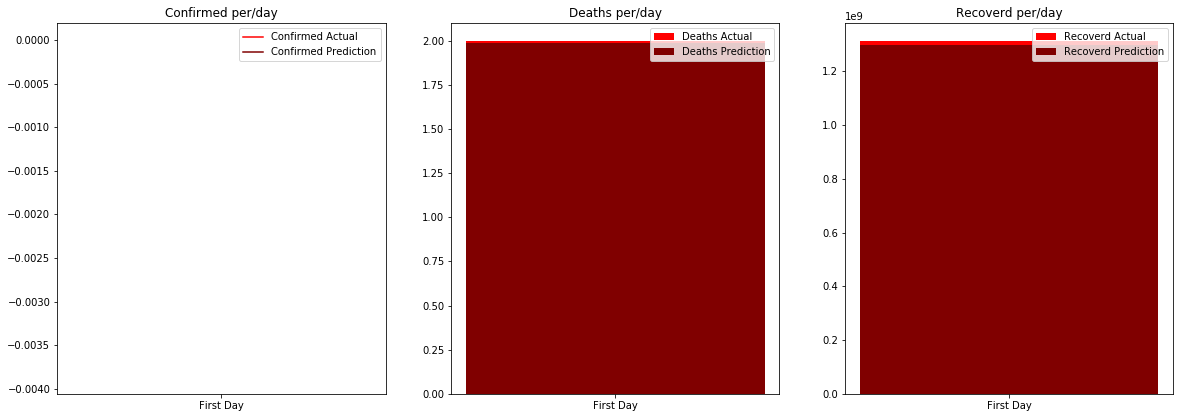

In [134]:
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()

# GRU

In [22]:
def base_model2(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(GRU(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    # one to many
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(GRU(50, return_sequences=True))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
opt = Adam(lr=0.01)
input_shape = (2, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer=opt,metrics=['acc',mse,rmse,r_square])
model.summary()
history = model.fit(x_train, y_train, batch_size=64, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 100)               36900     
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 4, 100)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 4, 50)             22650     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 4, 22)             1122      
Total params: 60,672
Trainable params: 60,672
Non-trainable params: 0
_________________________________________________________________
Train on 35456 samples, validate on 8864 samples
Epoch 1/100
35456/35456 [==============================] - 10s 291us/step - loss: 0.0095 - acc: 0.0937 - mse: 0.0095 - rmse: 0.0731 - r_square: 0.9359 - val_loss: 0.0587 - val_acc: 0.0000e+00 - val_mse: 0.0587 - val_rmse:

35456/35456 [==============================] - 7s 192us/step - loss: 0.0143 - acc: 0.0235 - mse: 0.0143 - rmse: 0.0937 - r_square: 0.9073 - val_loss: 0.0452 - val_acc: 0.0000e+00 - val_mse: 0.0452 - val_rmse: 0.1829 - val_r_square: 0.7043
Epoch 63/100
35456/35456 [==============================] - 7s 191us/step - loss: 0.0136 - acc: 0.0253 - mse: 0.0136 - rmse: 0.0908 - r_square: 0.9118 - val_loss: 0.0432 - val_acc: 0.0000e+00 - val_mse: 0.0432 - val_rmse: 0.1819 - val_r_square: 0.7193
Epoch 64/100
35456/35456 [==============================] - 7s 199us/step - loss: 0.0137 - acc: 0.0235 - mse: 0.0137 - rmse: 0.0915 - r_square: 0.9113 - val_loss: 0.0448 - val_acc: 0.0000e+00 - val_mse: 0.0448 - val_rmse: 0.1824 - val_r_square: 0.7075
Epoch 65/100
35456/35456 [==============================] - 7s 193us/step - loss: 0.0134 - acc: 0.1588 - mse: 0.0134 - rmse: 0.0899 - r_square: 0.9133 - val_loss: 0.0432 - val_acc: 0.0000e+00 - val_mse: 0.0432 - val_rmse: 0.1812 - val_r_square: 0.7193
Epoch

Epoch 95/100
35456/35456 [==============================] - 8s 213us/step - loss: 0.0142 - acc: 0.0361 - mse: 0.0142 - rmse: 0.0931 - r_square: 0.9077 - val_loss: 0.0437 - val_acc: 0.0000e+00 - val_mse: 0.0437 - val_rmse: 0.1825 - val_r_square: 0.7153
Epoch 96/100
35456/35456 [==============================] - 8s 213us/step - loss: 0.0125 - acc: 0.0650 - mse: 0.0125 - rmse: 0.0866 - r_square: 0.9185 - val_loss: 0.0434 - val_acc: 0.0000e+00 - val_mse: 0.0434 - val_rmse: 0.1822 - val_r_square: 0.7178
Epoch 97/100
35456/35456 [==============================] - 7s 194us/step - loss: 0.0134 - acc: 0.0253 - mse: 0.0134 - rmse: 0.0898 - r_square: 0.9130 - val_loss: 0.0434 - val_acc: 0.0000e+00 - val_mse: 0.0434 - val_rmse: 0.1818 - val_r_square: 0.7178
Epoch 98/100
35456/35456 [==============================] - 7s 193us/step - loss: 0.0137 - acc: 0.0217 - mse: 0.0137 - rmse: 0.0912 - r_square: 0.9112 - val_loss: 0.0463 - val_acc: 0.0000e+00 - val_mse: 0.0463 - val_rmse: 0.1854 - val_r_square:

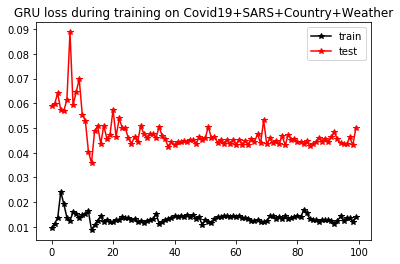

In [23]:
plt.plot(history.history['loss'],'k-*',label='train')
plt.plot(history.history['val_loss'],'r-*', label='test')
plt.legend()
plt.title("GRU loss during training on Covid19+SARS+Country+Weather")
plt.savefig("GRULOSS_Covid19 Sars Weather country.pdf", bbox_inches='tight')
plt.show()

----------------------------------------------------------------------------------------------------
Train Score: 0.02737362 MSE (0.16544975 RMSE ) , 0.00000000  ACC
Validation Score: 0.04929391 MSE (0.22202232 RMSE ) , 0.00000000  ACC


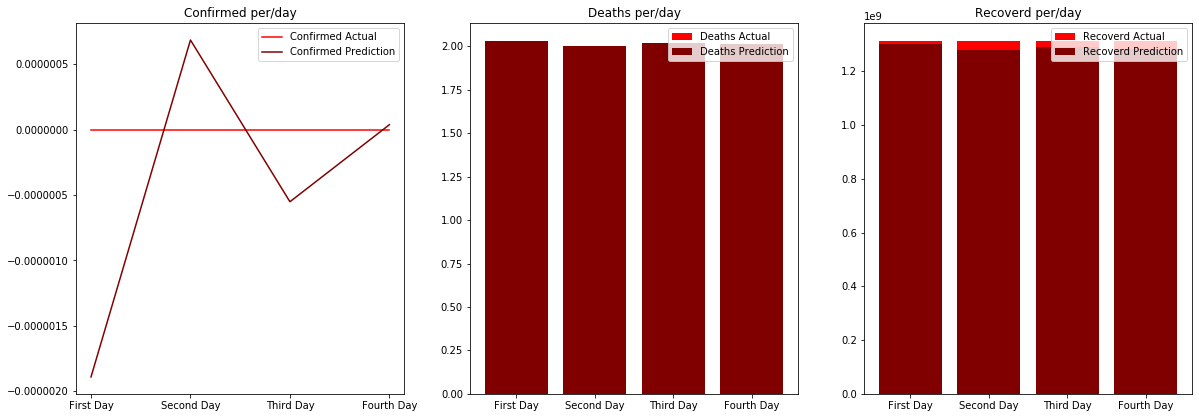

In [135]:
import math 
print('-' * 100)
train_score = model.evaluate(x=x_train, y=y_train, batch_size=3, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (train_score[0], math.sqrt(train_score[0]),train_score[1]*100)  )
validate_score = model.evaluate(x=x_validate, y=y_validate, batch_size=3, verbose=0)
print('Validation Score: %.8f MSE (%.8f RMSE ) , %.8f  ACC' % (validate_score[0], math.sqrt(validate_score[0]),validate_score[1]*100))

train_predict = model.predict(x_train)
validate_predict = model.predict(x_validate)

def inverse_normalize_data(data, scaler):
    for i in range(len(data)):
        data[i] = scaler.inverse_transform(data[i])

    return data

train_predict= inverse_normalize_data(train_predict, scaler)
y_train = inverse_normalize_data(y_train, scaler)
validate_predict = inverse_normalize_data(validate_predict, scaler)
y_validate= inverse_normalize_data(y_validate, scaler)
#test_predict = inverse_normalize_data(test_predict, scaler)
day = ['First Day','Second Day','Third Day','Fourth Day']
#dfx = pd.DataFrame(data=[y_validate[:], validate_predict])
#dfx = dfx.T
#dfx
fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)

ax1.plot(day,y_validate[:,:,0][0],color='red',label='Confirmed Actual')
ax1.plot(day,validate_predict[:,:,0][0],color='maroon',label='Confirmed Prediction')
ax1.title.set_text("Confirmed per/day")
ax1.legend()


ax2.bar(day,y_validate[:,:,1][0],color='red',label='Deaths Actual')
ax2.bar(day,validate_predict[:,:,1][0],color='maroon',label='Deaths Prediction')
ax2.title.set_text("Deaths per/day")
ax2.legend()


ax3.bar(day,y_validate[:,:,2][0],color='red',label='Recoverd Actual')
ax3.bar(day,validate_predict[:,:,2][0],color='maroon',label='Recoverd Prediction')
ax3.title.set_text("Recoverd per/day")
ax3.legend()

plt.show()

# Seq2Seq model

In [18]:
input_shape = (2, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
# mlp overfit on the moons dataset with patient early stopping and model checkpointing
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Instructions for updating:
Use tf.cast instead.
Train on 35456 samples, validate on 8864 samples
Epoch 1/100
35456/35456 [==============================] - 9s 253us/step - loss: 0.0579 - acc: 0.1878 - rmse: 0.1876 - mse: 0.0579 - r_square: 0.6067 - val_loss: 0.0310 - val_acc: 0.2459 - val_rmse: 0.1302 - val_mse: 0.0310 - val_r_square: 0.7905
Epoch 2/100
35456/35456 [==============================] - 5s 151us/step - loss: 0.0142 - acc: 0.1482 - rmse: 0.1002 - mse: 0.0142 - r_square: 0.9057 - val_loss: 0.0245 - val_acc: 0.0000e+00 - val_rmse: 0.1104 - val_mse: 0.0245 - val_r_square: 0.8334
Epoch 3/100
35456/35456 [==============================] - 5s 152us/step - loss: 0.0066 - acc: 0.1498 - rmse: 0.0686 - mse: 0.0066 - r_square: 0.9553 - val_loss: 0.0206 - val_acc: 9.5894e-04 - val_rmse: 0.0960 - val_mse: 0.0206 - val_r_square: 0.8594
Epoch 4/100
35456/35456 [==============================] - 5s 155us/step - loss: 0.0052 - acc: 0.1187 - rmse: 0.0636 - mse: 0.0052 - r_square: 0.9651 - va

Epoch 33/100
35456/35456 [==============================] - 5s 143us/step - loss: 0.0022 - acc: 0.0854 - rmse: 0.0416 - mse: 0.0022 - r_square: 0.9856 - val_loss: 0.0181 - val_acc: 2.8204e-04 - val_rmse: 0.0887 - val_mse: 0.0181 - val_r_square: 0.8766
Epoch 34/100
35456/35456 [==============================] - 5s 143us/step - loss: 0.0023 - acc: 0.1245 - rmse: 0.0422 - mse: 0.0023 - r_square: 0.9849 - val_loss: 0.0173 - val_acc: 0.0000e+00 - val_rmse: 0.0872 - val_mse: 0.0173 - val_r_square: 0.8821
Epoch 35/100
35456/35456 [==============================] - 5s 143us/step - loss: 0.0022 - acc: 0.0996 - rmse: 0.0411 - mse: 0.0022 - r_square: 0.9860 - val_loss: 0.0173 - val_acc: 2.8204e-05 - val_rmse: 0.0860 - val_mse: 0.0173 - val_r_square: 0.8816
Epoch 36/100
35456/35456 [==============================] - 5s 142us/step - loss: 0.0021 - acc: 0.0809 - rmse: 0.0407 - mse: 0.0021 - r_square: 0.9864 - val_loss: 0.0177 - val_acc: 5.6408e-04 - val_rmse: 0.0856 - val_mse: 0.0177 - val_r_square:

Epoch 66/100
35456/35456 [==============================] - 5s 143us/step - loss: 0.0015 - acc: 0.2566 - rmse: 0.0338 - mse: 0.0015 - r_square: 0.9898 - val_loss: 0.0169 - val_acc: 0.0962 - val_rmse: 0.0782 - val_mse: 0.0169 - val_r_square: 0.8837
Epoch 67/100
35456/35456 [==============================] - 5s 143us/step - loss: 0.0017 - acc: 0.2184 - rmse: 0.0352 - mse: 0.0017 - r_square: 0.9891 - val_loss: 0.0167 - val_acc: 0.0236 - val_rmse: 0.0791 - val_mse: 0.0167 - val_r_square: 0.8851
Epoch 68/100
35456/35456 [==============================] - 5s 144us/step - loss: 0.0015 - acc: 0.2624 - rmse: 0.0337 - mse: 0.0015 - r_square: 0.9898 - val_loss: 0.0165 - val_acc: 0.1220 - val_rmse: 0.0779 - val_mse: 0.0165 - val_r_square: 0.8868
Epoch 69/100
35456/35456 [==============================] - 5s 145us/step - loss: 0.0015 - acc: 0.2186 - rmse: 0.0336 - mse: 0.0015 - r_square: 0.9902 - val_loss: 0.0166 - val_acc: 0.2018 - val_rmse: 0.0781 - val_mse: 0.0166 - val_r_square: 0.8858
Epoch 70

35456/35456 [==============================] - 5s 142us/step - loss: 0.0013 - acc: 0.1682 - rmse: 0.0306 - mse: 0.0013 - r_square: 0.9914 - val_loss: 0.0162 - val_acc: 0.6407 - val_rmse: 0.0769 - val_mse: 0.0162 - val_r_square: 0.8886
Epoch 100/100
35456/35456 [==============================] - 5s 143us/step - loss: 0.0013 - acc: 0.1947 - rmse: 0.0310 - mse: 0.0013 - r_square: 0.9914 - val_loss: 0.0165 - val_acc: 0.6126 - val_rmse: 0.0768 - val_mse: 0.0165 - val_r_square: 0.8865
